In [1]:
# coding: utf-8

from __future__ import division
from __future__ import print_function

import numpy as np
import emcee
import pyspike as spk
import neurofit as nf
import neurofit.cneurons as cn

from scipy.signal import decimate, resample

import utils
import os
import shutil
import time
from os import walk
import os
import sys

#plotting packages
%matplotlib inline
from matplotlib.pyplot import * # plotting functions
import seaborn as sns           # data visualization package
import pandas as pd             # data analysis and manipulation package
from corner import corner 

sns.set_style('white')
clr = sns.color_palette('cubehelix',4)
sns.set_palette(sns.color_palette(clr))
rcParams['figure.figsize'] = (16,10) 

In [37]:
exclude = ["blabla1904_1_B","oo1712_2_B","oo1920_2_B","pupu0333_4_B", "pupu0333_4_B",
           "yy2728_6_B","oo1220_5_B","pupu0606_2_B", "pupu0606_3_B", "yy0212_6", "yy1617_3_B"]

# load mcmc results
region = "cm"
stim_type = "conspecific"
root = "/scratch/tyler/dstrf_results/round_two/"
path = "/".join([root,region,""])

cm_results = {}
for root, directories, filenames in os.walk(path):
    for filename in filenames: 
        if root.split("/")[6] in exclude: 
            pass
        else:
            name, ext = filename.split(".")
            if ext == "npz":
                cm_results[name] = np.load(os.path.join(root,filename))

cm_maxlik = np.asarray([cm_results[m]['maxlik'] for m in cm_results.keys()])
cm_chain = np.asarray([cm_results[m]['chain'] for m in cm_results.keys()])

s = cm_chain.shape
cm_chain = cm_chain.reshape(s[0] * s[1], s[2])

In [38]:
# load mcmc results
region = "l2a"
stim_type = "conspecific"
root = "/scratch/tyler/dstrf_results/round_two"
path = "/".join([root,region,""])

l2a_results = {}
for root, directories, filenames in os.walk(path):
    for filename in filenames: 
        if root.split("/")[6] in exclude: pass
        else:
            name, ext = filename.split(".")
            if ext == "npz":
                l2a_results[name] = np.load(os.path.join(root,filename))

l2a_maxlik = np.asarray([l2a_results[m]['maxlik'] for m in l2a_results.keys()])
l2a_chain = np.asarray([l2a_results[m]['chain'] for m in l2a_results.keys()])

s = l2a_chain.shape
l2a_chain = l2a_chain.reshape(s[0] * s[1], s[2])

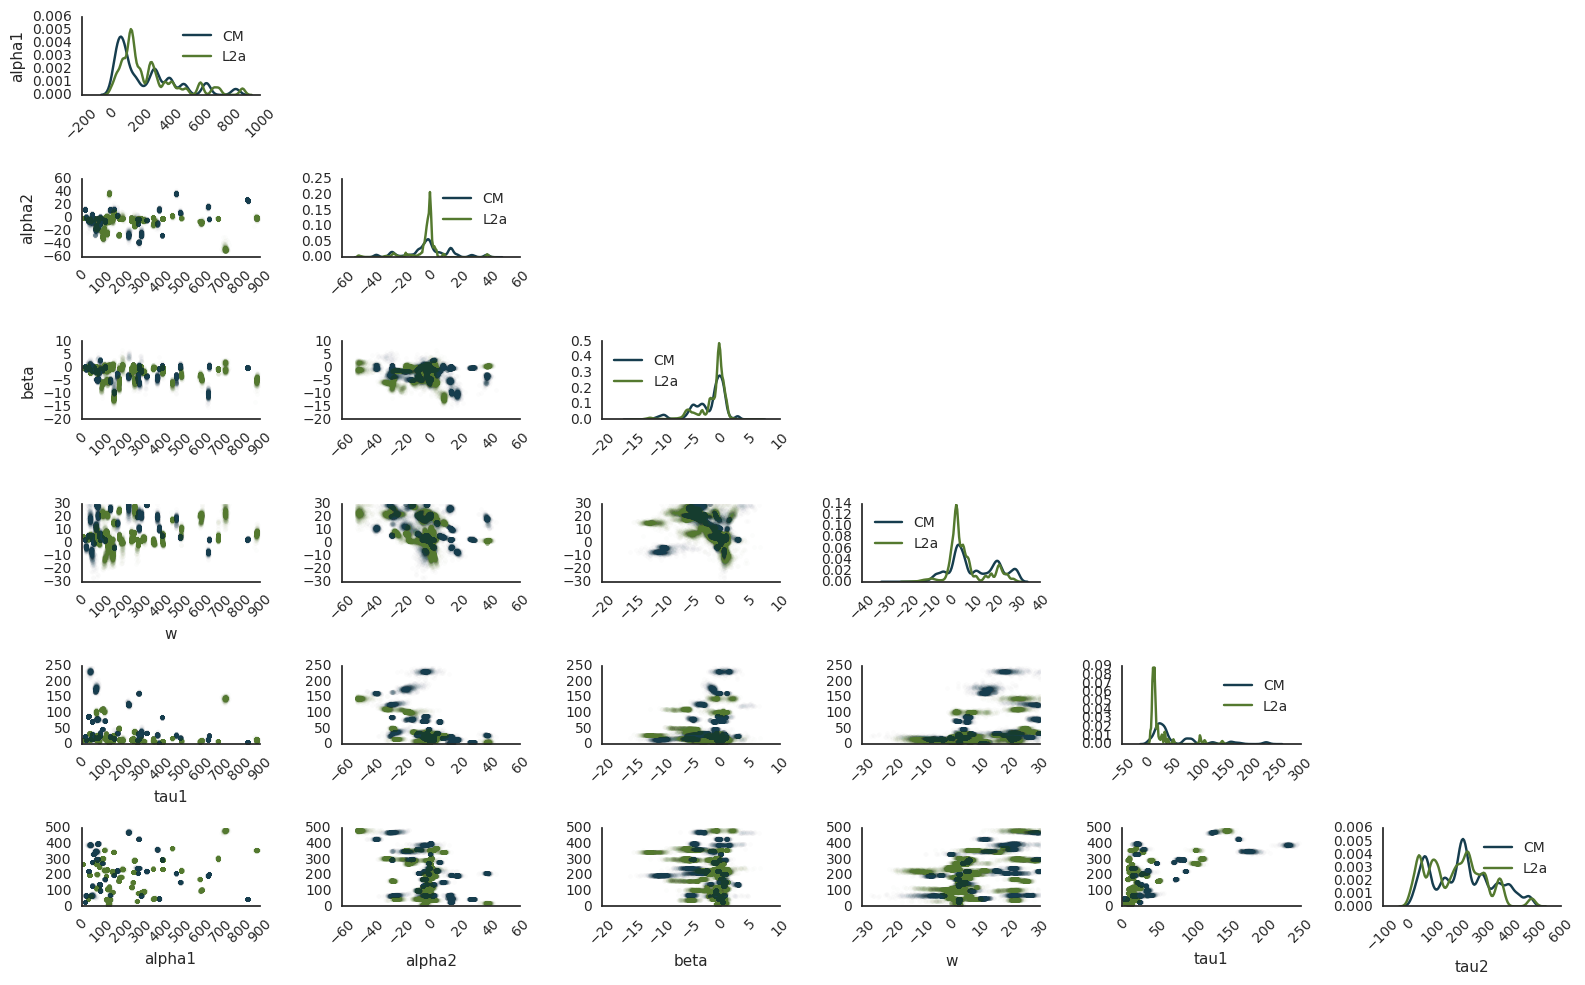

In [39]:
for i in range(6):
    for j in range(6):
        if j > i: break; 
        subplot(6,6,6*i+j+1)
        if i == j:
            sns.distplot(cm_chain[:,i],hist=False,label="CM")
            sns.distplot(l2a_chain[:,j],hist=False,label="L2a")
        else:
            plot(cm_chain[:,j],cm_chain[:,i],'.',alpha=0.01)
            plot(l2a_chain[:,j],l2a_chain[:,i],'.',alpha=0.01)
        
        xticks(rotation=45)    
        sns.despine()
            
        if 6*i+j == 0: ylabel("alpha1")
        if 6*i+j == 6: ylabel("alpha2")
        if 6*i+j == 12: ylabel("beta")
        if 6*i+j == 18: xlabel("w")
        if 6*i+j == 24: xlabel("tau1")
        if 6*i+j == 30: xlabel("tau2"); xlabel("alpha1")
        if 6*i+j == 31: xlabel("alpha2")
        if 6*i+j == 32: xlabel("beta")
        if 6*i+j == 33: xlabel("w")
        if 6*i+j == 34: xlabel("tau1")
        if 6*i+j == 35: xlabel("tau2")
                        
tight_layout()

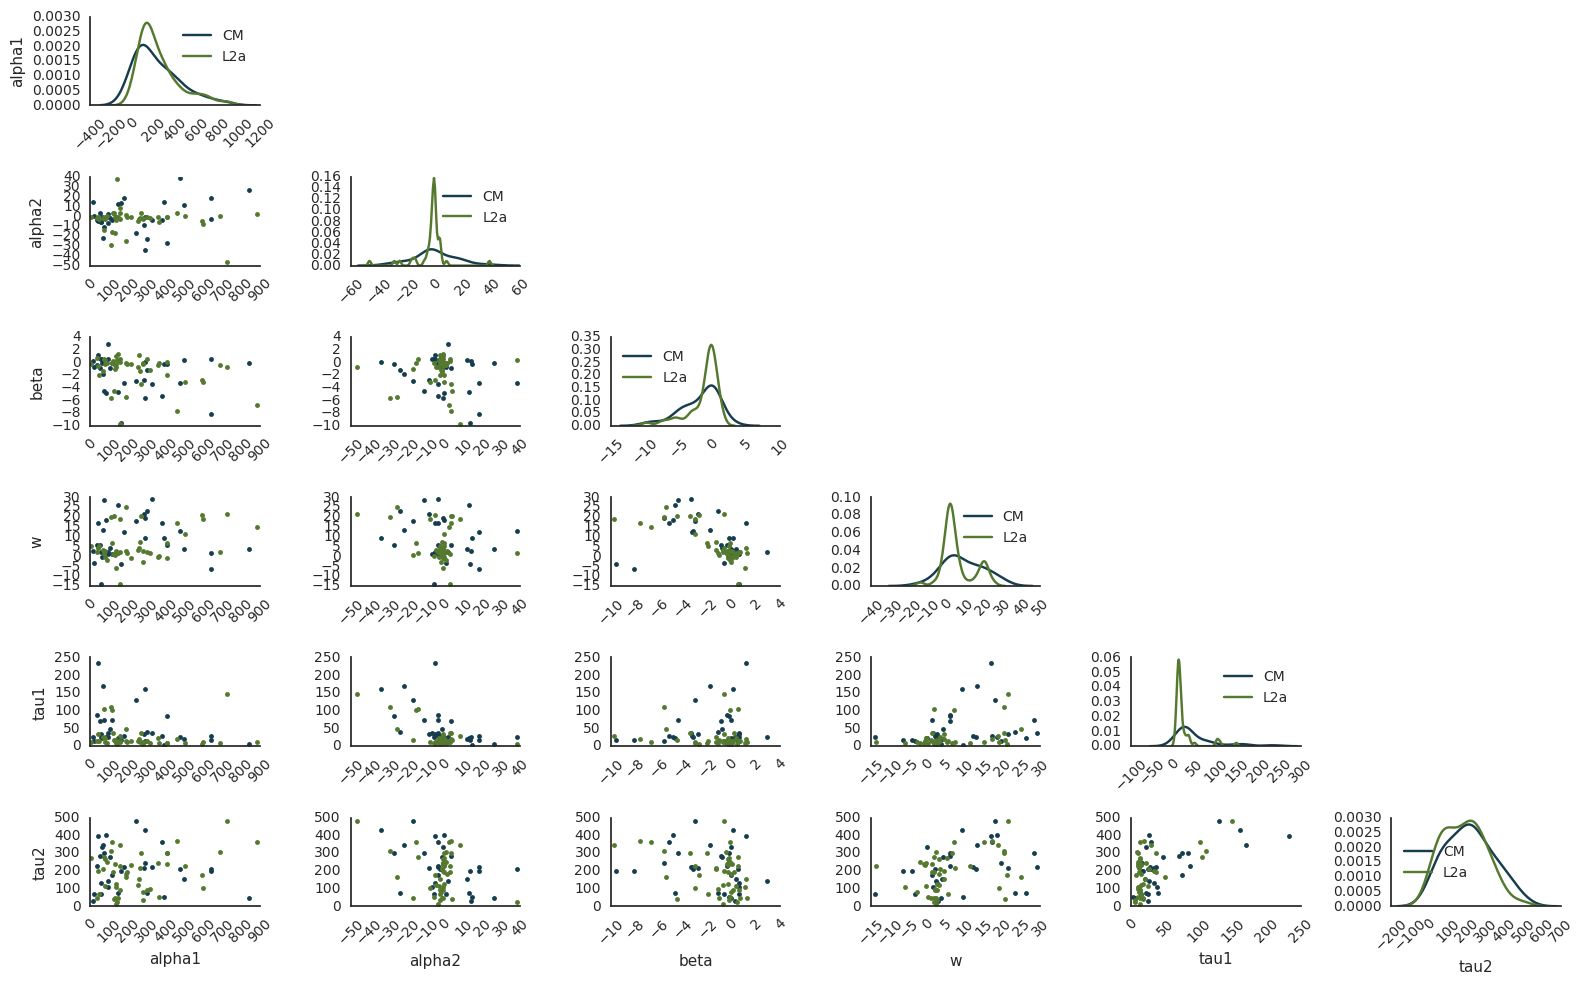

In [40]:
for i in range(6):
    for j in range(6):
        if j > i: break
        subplot(6,6,6*i+j+1)
        if i == j:
            sns.distplot(cm_maxlik[:,i],hist=False,label="CM")
            sns.distplot(l2a_maxlik[:,j],hist=False,label="L2a")
        else:
            plot(cm_maxlik[:,j],cm_maxlik[:,i],'.',alpha=1)
            plot(l2a_maxlik[:,j],l2a_maxlik[:,i],'.',alpha=1)
        
        xticks(rotation=45)    
        sns.despine()
            
        if 6*i+j == 0: ylabel("alpha1");
        if 6*i+j == 6: ylabel("alpha2")
        if 6*i+j == 12: ylabel("beta")
        if 6*i+j == 18: ylabel("w")
        if 6*i+j == 24: ylabel("tau1")
        if 6*i+j == 30: ylabel("tau2"); xlabel("alpha1")
        if 6*i+j == 31: xlabel("alpha2")
        if 6*i+j == 32: xlabel("beta")
        if 6*i+j == 33: xlabel("w")
        if 6*i+j == 34: xlabel("tau1")
        if 6*i+j == 35: xlabel("tau2")


tight_layout()